<a href="https://colab.research.google.com/github/KomaliValluru/DS/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install transformers[sentencepiece] datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.6 MB/s eta 0:00:00


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

## Getting into datasets library

In [4]:
from datasets import list_datasets
list_datasets()

<ipython-input-4-a55d55f678a9>:2: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'americas_nli',
 'ami',
 'amttl',
 'anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'bigIR/ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'facebook/babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'TheBritishLibrary/blbooks',
 'TheBritishLibrary/blbooksgenre',
 'blended_skill_talk',
 'blimp',
 'blog_authorship_corpus',
 'bn_hate_speech',


In [5]:
from datasets import load_dataset

sst2 = load_dataset("sst2")
sst2

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 872
    })
    test: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 1821
    })
})

# About Dataset
The dataset I chose is Stanford Sentiment Treebank which are labeled data extracted from HuggingFace. This dataset is a composition of movie reviews
Label 0: Negative
Label 1: Positive
Label -1: Testing data

This section is to learn more about data

In [6]:
sst2['train'][:2]

{'idx': [0, 1],
 'sentence': ['hide new secretions from the parental units ',
  'contains no wit , only labored gags '],
 'label': [0, 0]}

In [7]:
sst2['test'][:3]

{'idx': [0, 1, 2],
 'sentence': ['uneasy mishmash of styles and genres .',
  "this film 's relationship to actual tension is the same as what christmas-tree flocking in a spray can is to actual snow : a poor -- if durable -- imitation .",
  'by the end of no such thing the audience , like beatrice , has a watchful affection for the monster .'],
 'label': [-1, -1, -1]}

In [8]:
# Selecting only 3000 samples from the original training set
sst2['train'] = sst2['train'].shuffle(seed=1).select(range(3000))
sst2['train']

Dataset({
    features: ['idx', 'sentence', 'label'],
    num_rows: 3000
})

In [31]:
sst2_train_validation = sst2['train'].train_test_split(train_size=0.8)
sst2_train_validation

DatasetDict({
    train: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 2400
    })
    test: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 600
    })
})

In [34]:
sst2_train_validation['validation'] = sst2_train_validation.pop('test')
sst2_train_validation

DatasetDict({
    train: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 2400
    })
    validation: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 600
    })
})

In [35]:
sst2.update(sst2_train_validation)
sst2

DatasetDict({
    train: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 2400
    })
    validation: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 600
    })
    test: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 1821
    })
})

# Implementation

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
sst2.set_format('pandas')
df = sst2['train'][:]
df.pop('idx')
df['sentence'] = df['sentence'].astype(str)
df.sample(frac=1 ,random_state=1).head(10)


,sentence,label
1348,'s also probably the most good-hearted yet sen...,1
468,a not-so-divine secrets of the ya-ya sisterhoo...,0
1463,exaggerated action,0
2267,stimulate,1
943,"skins has a desolate air , but eyre , a native...",1
839,are littered with trenchant satirical jabs at ...,0
396,'re in luck,1
1236,"a vivid , spicy footnote to history , and",1
900,... does n't deserve the energy it takes to de...,0
2190,( `` take care of my cat '' ) is an honestly n...,1


In [65]:
df[df.sentence.str.len() < 200]
df.dtypes

sentence            object
label                int64
Words per review     int64
dtype: object

In [49]:
df.label.value_counts()

1    1352
0    1048
Name: label, dtype: int64

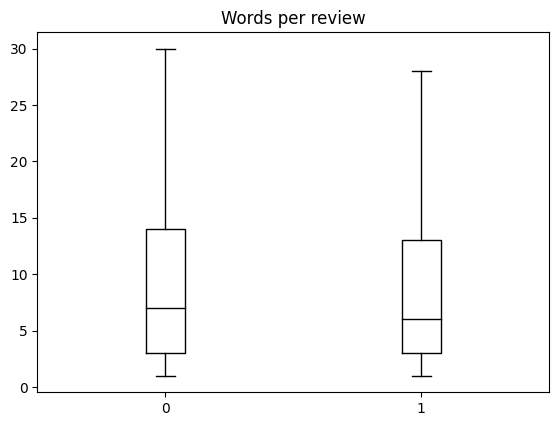

In [63]:
df["Words per review"] = df["sentence"].str.split().apply(len)
df.boxplot("Words per review", by="label", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

# Generating Tokens
Using the 'bert-base-cased' checkpoint. This generates tokens while considering the case of text.

In [67]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-cased"
#checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
    return tokenizer(str(batch["sentence"]), padding=True, truncation=True)

sst2_encoded = sst2.map(tokenize_function, batched=True, batch_size=None)
sst2_encoded

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/2400 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 127
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 140
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 161
    })
})

In [68]:
print(sst2_encoded['train'][0])

   input_ids  attention_mask
0        101               1
